Import Dependies

In [8]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from tensorflow.keras.regularizers import l1, l2
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import os

Load Abalone Dataset (Regression)

In [9]:
abalone_df = pd.read_csv('abalone.csv')
abalone_df['Sex'] = abalone_df['Sex'].map({'M': 0, 'F': 1, 'I': 2})  # Encode categorical column
X_abalone = abalone_df.drop(columns=['Rings']).values
y_abalone = abalone_df['Rings'].values

Split data into train/test sets

In [10]:
X_train_abalone, X_test_abalone, y_train_abalone, y_test_abalone = train_test_split(X_abalone, y_abalone, test_size=0.2, random_state=42)

Load Iris Dataset (Classification)

In [11]:
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Split Iris data into train/test sets
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# 1. Create TensorFlow Data Pipeline

In [14]:
def preprocess(features, labels):
    features = tf.cast(features, dtype=tf.float32)
    labels = tf.cast(labels, dtype=tf.float32)
    return features, labels

train_dataset_abalone = tf.data.Dataset.from_tensor_slices((X_train_abalone, y_train_abalone))
train_dataset_abalone = train_dataset_abalone.shuffle(buffer_size=1024).batch(32).map(preprocess)

test_dataset_abalone = tf.data.Dataset.from_tensor_slices((X_test_abalone, y_test_abalone))
test_dataset_abalone = test_dataset_abalone.batch(32).map(preprocess)

# 2. Simple Linear Regression Model for Abalone

In [15]:
linear_model_abalone = Sequential([
    Dense(1, input_dim=X_train_abalone.shape[1], activation='linear')  # No activation for linear output
])

linear_model_abalone.compile(optimizer='adam', loss='mse')
linear_model_abalone.fit(X_train_abalone, y_train_abalone, epochs=50, validation_data=(X_test_abalone, y_test_abalone))

Epoch 1/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 101.7322 - val_loss: 95.0199
Epoch 2/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 91.4653 - val_loss: 86.4826
Epoch 3/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 86.3435 - val_loss: 78.6433
Epoch 4/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 76.3900 - val_loss: 71.4280
Epoch 5/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 69.4906 - val_loss: 64.7848
Epoch 6/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 63.5849 - val_loss: 58.6860
Epoch 7/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 57.1838 - val_loss: 53.1326
Epoch 8/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 50.5313 - val_loss: 48.0559
Epoch 9/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 47.3706 - val_loss: 43.4593
Epoch 10/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 41.0969 - val_loss: 39.2917
Epoch 11/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37.8488 - val_loss: 35.5071
Epoch 12/50
105/105 ━━━━━━━━━

# 3. Multi-layer Perceptron (MLP) Model for Abalone

In [16]:
mlp_model_abalone = Sequential([
    Dense(128, input_dim=X_train_abalone.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)  # Linear output for regression
])

mlp_model_abalone.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
mlp_model_abalone.fit(X_train_abalone, y_train_abalone, epochs=50, validation_data=(X_test_abalone, y_test_abalone), callbacks=[early_stopping])



Epoch 1/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 71.6440 - val_loss: 8.6314
Epoch 2/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.9209 - val_loss: 7.2508
Epoch 3/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.6898 - val_loss: 6.5027
Epoch 4/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.2634 - val_loss: 6.0958
Epoch 5/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.4955 - val_loss: 5.7633
Epoch 6/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.6442 - val_loss: 5.5478
Epoch 7/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.1943 - val_loss: 5.5115
Epoch 8/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.4737 - val_loss: 5.4383
Epoch 9/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.1509 - val_loss: 5.0903
Epoch 10/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8426 - val_loss: 4.9934
Epoch 11/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.6556 - val_loss: 5.1736
Epoch 12/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/ste

# 4. Dropout Model for Abalone

In [17]:
dropout_model_abalone = Sequential([
    Dense(128, input_dim=X_train_abalone.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1)
])

dropout_model_abalone.compile(optimizer='adam', loss='mse')
dropout_model_abalone.fit(X_train_abalone, y_train_abalone, epochs=50, validation_data=(X_test_abalone, y_test_abalone), callbacks=[early_stopping])


Epoch 1/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 66.5658 - val_loss: 8.5512
Epoch 2/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.4220 - val_loss: 7.3244
Epoch 3/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.5941 - val_loss: 6.5801
Epoch 4/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.4152 - val_loss: 6.5799
Epoch 5/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.3158 - val_loss: 6.0527
Epoch 6/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.7651 - val_loss: 5.9060
Epoch 7/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.1404 - val_loss: 5.8078
Epoch 8/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.6050 - val_loss: 5.5887
Epoch 9/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.5632 - val_loss: 5.4333
Epoch 10/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.5287 - val_loss: 5.4237
Epoch 11/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.5346 - val_loss: 5.3334
Epoch 12/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/ste

# 5. Batch Normalization Model for Abalone

In [18]:
batch_norm_model_abalone = Sequential([
    Dense(128, input_dim=X_train_abalone.shape[1], activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dense(1)
])

batch_norm_model_abalone.compile(optimizer='adam', loss='mse')
batch_norm_model_abalone.fit(X_train_abalone, y_train_abalone, epochs=50, validation_data=(X_test_abalone, y_test_abalone), callbacks=[early_stopping])


Epoch 1/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 52.3481 - val_loss: 51.7380
Epoch 2/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.3267 - val_loss: 38.0518
Epoch 3/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.8389 - val_loss: 24.3253
Epoch 4/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.7283 - val_loss: 12.3706
Epoch 5/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.4949 - val_loss: 8.0264
Epoch 6/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.5389 - val_loss: 5.0836
Epoch 7/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.3803 - val_loss: 5.0029
Epoch 8/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.2627 - val_loss: 5.3361
Epoch 9/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.7003 - val_loss: 4.7957
Epoch 10/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.0192 - val_loss: 5.4669
Epoch 11/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.6625 - val_loss: 5.5690
Epoch 12/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms

# 6. Custom Loss Function for Abalone

In [19]:
def custom_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred)) + 0.01 * tf.reduce_sum(tf.square(y_pred))

# 7. L1 Regularization Model for Abalone

In [20]:
l1_model_abalone = Sequential([
    Dense(128, input_dim=X_train_abalone.shape[1], activation='relu', kernel_regularizer=l1(0.01)),
    Dense(64, activation='relu'),
    Dense(1)
])

l1_model_abalone.compile(optimizer='adam', loss='mse')
l1_model_abalone.fit(X_train_abalone, y_train_abalone, epochs=50, validation_data=(X_test_abalone, y_test_abalone), callbacks=[early_stopping])


Epoch 1/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 68.4083 - val_loss: 9.5225
Epoch 2/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.0680 - val_loss: 7.9397
Epoch 3/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.8630 - val_loss: 7.1528
Epoch 4/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.1039 - val_loss: 6.9238
Epoch 5/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.3599 - val_loss: 6.4931
Epoch 6/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.1103 - val_loss: 6.3875
Epoch 7/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.2422 - val_loss: 6.1030
Epoch 8/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 5.6062 - val_loss: 5.9365
Epoch 9/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 5.7491 - val_loss: 5.8990
Epoch 10/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.6854 - val_loss: 5.7197
Epoch 11/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.6045 - val_loss: 5.6378
Epoch 12/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

# 8. L2 Regularization Model for Abalone

In [21]:
l2_model_abalone = Sequential([
    Dense(128, input_dim=X_train_abalone.shape[1], activation='relu', kernel_regularizer=l2(0.01)),
    Dense(64, activation='relu'),
    Dense(1)
])

l2_model_abalone.compile(optimizer='adam', loss='mse')
l2_model_abalone.fit(X_train_abalone, y_train_abalone, epochs=50, validation_data=(X_test_abalone, y_test_abalone), callbacks=[early_stopping])


Epoch 1/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 66.8103 - val_loss: 9.5170
Epoch 2/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.2596 - val_loss: 8.1594
Epoch 3/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.8567 - val_loss: 6.9686
Epoch 4/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.6377 - val_loss: 6.3197
Epoch 5/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.0056 - val_loss: 6.0380
Epoch 6/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.6483 - val_loss: 5.9718
Epoch 7/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.7747 - val_loss: 5.7070
Epoch 8/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.5333 - val_loss: 5.5882
Epoch 9/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.5055 - val_loss: 5.4414
Epoch 10/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.4609 - val_loss: 5.3559
Epoch 11/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.6748 - val_loss: 5.3189
Epoch 12/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/ste

# 9. Learning Rate Scheduling for Abalone

In [22]:
lr_scheduler_abalone = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)


# 10. Model Checkpointing for Abalone

In [23]:
checkpoint_abalone = ModelCheckpoint('best_model_abalone.keras', monitor='val_loss', save_best_only=True)

# 11. Train Model with TensorFlow Callbacks for Abalone

In [24]:
model_with_callbacks_abalone = Sequential([
    Dense(128, input_dim=X_train_abalone.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

model_with_callbacks_abalone.compile(optimizer='adam', loss='mse')
model_with_callbacks_abalone.fit(X_train_abalone, y_train_abalone, epochs=50, validation_data=(X_test_abalone, y_test_abalone),
                                 callbacks=[early_stopping, lr_scheduler_abalone, checkpoint_abalone])


Epoch 1/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 68.2981 - val_loss: 8.9746 - learning_rate: 0.0010
Epoch 2/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.7525 - val_loss: 7.4130 - learning_rate: 0.0010
Epoch 3/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.2700 - val_loss: 6.6030 - learning_rate: 0.0010
Epoch 4/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.0211 - val_loss: 6.0474 - learning_rate: 0.0010
Epoch 5/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.8876 - val_loss: 6.0336 - learning_rate: 0.0010
Epoch 6/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.5561 - val_loss: 5.5837 - learning_rate: 0.0010
Epoch 7/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.3596 - val_loss: 5.4424 - learning_rate: 0.0010
Epoch 8/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.6432 - val_loss: 5.2483 - learning_rate: 0.0010
Epoch 9/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.7270 - val_loss: 5.1071 - learning_rate: 0.0010
Epoch 10/

# 12. Custom Metric for Abalone: Mean Absolute Error

In [25]:
class CustomMAE(tf.keras.metrics.Metric):
    def __init__(self, name='custom_mae', **kwargs):
        super(CustomMAE, self).__init__(name=name, **kwargs)
        self.total = self.add_weight(name='total', initializer='zeros')
        self.count = self.add_weight(name='count', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        # Ensure both y_true and y_pred are of the same dtype
        y_true = tf.cast(y_true, tf.float32)  # Convert y_true to float32 if it's int64
        abs_diff = tf.abs(y_true - y_pred)
        self.total.assign_add(tf.reduce_sum(abs_diff))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))

    def result(self):
        return self.total / self.count


# 13. Train with Custom Metric for Abalone

In [26]:
custom_metric_model_abalone = Sequential([
    Dense(128, input_dim=X_train_abalone.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

custom_metric_model_abalone.compile(optimizer='adam', loss='mse', metrics=[CustomMAE()])
custom_metric_model_abalone.fit(X_train_abalone, y_train_abalone, epochs=50, validation_data=(X_test_abalone, y_test_abalone), callbacks=[early_stopping])


Epoch 1/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - custom_mae: 250.6339 - loss: 76.5062 - val_custom_mae: 94.0053 - val_loss: 9.5341
Epoch 2/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - custom_mae: 97.1300 - loss: 8.7500 - val_custom_mae: 95.3568 - val_loss: 7.5247
Epoch 3/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - custom_mae: 93.1086 - loss: 7.0467 - val_custom_mae: 92.4125 - val_loss: 6.6255
Epoch 4/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - custom_mae: 93.0380 - loss: 6.5474 - val_custom_mae: 92.9257 - val_loss: 6.1295
Epoch 5/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - custom_mae: 89.0396 - loss: 5.8019 - val_custom_mae: 90.3359 - val_loss: 6.2152
Epoch 6/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - custom_mae: 90.9953 - loss: 6.2030 - val_custom_mae: 97.9906 - val_loss: 6.0114
Epoch 7/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - custom_mae: 92.5978 - loss: 5.4330 - val_custom_mae: 93.7991 - val_loss: 5.5008
Epoch 8/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - custom

# 14. TensorBoard for Visualization (Abalone)

In [27]:
tensorboard_callback_abalone = TensorBoard(log_dir=os.path.join('logs', 'abalone'))


# 15. Predict with the Model (Abalone)

In [28]:
sample_data_abalone = tf.convert_to_tensor(X_test_abalone[:5], dtype=tf.float32)
predictions_abalone = model_with_callbacks_abalone.predict(sample_data_abalone)
print("Sample Predictions (Abalone):", predictions_abalone)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Sample Predictions (Abalone): [[11.913522]
 [10.310927]
 [14.275763]
 [11.679053]
 [11.414187]]


# Iris Dataset Classification Model (using MLP)
# 16. Multi-layer Perceptron (MLP) for Iris

In [29]:
mlp_model_iris = Sequential([
    Dense(128, input_dim=X_train_iris.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes for classification (Iris dataset)
])

mlp_model_iris.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mlp_model_iris.fit(X_train_iris, y_train_iris, epochs=50, validation_data=(X_test_iris, y_test_iris), callbacks=[early_stopping])


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 318ms/step - accuracy: 0.6435 - loss: 1.0110 - val_accuracy: 0.6333 - val_loss: 0.8846
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.7175 - loss: 0.8874 - val_accuracy: 0.8333 - val_loss: 0.8255
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.7408 - loss: 0.8122 - val_accuracy: 0.7000 - val_loss: 0.7468
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.6456 - loss: 0.7517 - val_accuracy: 0.7000 - val_loss: 0.6834
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - accuracy: 0.7081 - loss: 0.6765 - val_accuracy: 0.8000 - val_loss: 0.6319
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.8471 - loss: 0.6298 - val_accuracy: 0.9667 - val_loss: 0.5870
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.9510 - loss: 0.5808 - val_accuracy: 0.9333 - val_loss: 0.5471
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.8913 - loss: 0.5278 - val_accuracy: 0.8000 - val_loss: 0.

# 17. Dropout for Iris Classification


In [30]:
dropout_model_iris = Sequential([
    Dense(128, input_dim=X_train_iris.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

dropout_model_iris.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
dropout_model_iris.fit(X_train_iris, y_train_iris, epochs=50, validation_data=(X_test_iris, y_test_iris), callbacks=[early_stopping])


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 394ms/step - accuracy: 0.2965 - loss: 1.4251 - val_accuracy: 0.3667 - val_loss: 1.0739
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step - accuracy: 0.4056 - loss: 1.1186 - val_accuracy: 0.3667 - val_loss: 1.0320
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.4081 - loss: 1.1379 - val_accuracy: 0.3667 - val_loss: 0.9232
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.5348 - loss: 1.0219 - val_accuracy: 0.7000 - val_loss: 0.8526
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.5894 - loss: 0.9842 - val_accuracy: 0.7000 - val_loss: 0.8072
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.6765 - loss: 0.8643 - val_accuracy: 0.7000 - val_loss: 0.7546
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.6117 - loss: 0.8786 - val_accuracy: 0.7000 - val_loss: 0.7034
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - accuracy: 0.6844 - loss: 0.7973 - val_accuracy: 0.7000 - val_loss: 

# 18. Model Checkpointing for Iris

In [1]:
checkpoint_iris = ModelCheckpoint('best_model_iris.keras', monitor='val_loss', save_best_only=True)

NameError: name 'ModelCheckpoint' is not defined

# 19. Predict with the Iris Model


In [32]:
sample_data_iris = tf.convert_to_tensor(X_test_iris[:5], dtype=tf.float32)
predictions_iris = mlp_model_iris.predict(sample_data_iris)
print("Sample Predictions (Iris):", predictions_iris)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
Sample Predictions (Iris): [[3.3180893e-03 8.5267818e-01 1.4400370e-01]
 [9.9687386e-01 3.1254927e-03 6.0617316e-07]
 [8.8813994e-07 2.1274907e-03 9.9787164e-01]
 [3.5194594e-03 8.0342835e-01 1.9305217e-01]
 [2.2715572e-03 9.0141135e-01 9.6317157e-02]]


In [33]:
# 1. Save the model for Abalone (Regression)
linear_model_abalone.save('best_model_abalone.keras')

# 2. Save the model for Iris (Classification)
mlp_model_iris.save('best_model_iris.keras')

# 19. Summary

In [36]:
linear_model_abalone.summary()
mlp_model_iris.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29 (120.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20 (84.00 B)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,275 (106.55 KB)

 Trainable params: 9,091 (35.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18,184 (71.04 KB)

## Plotting

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


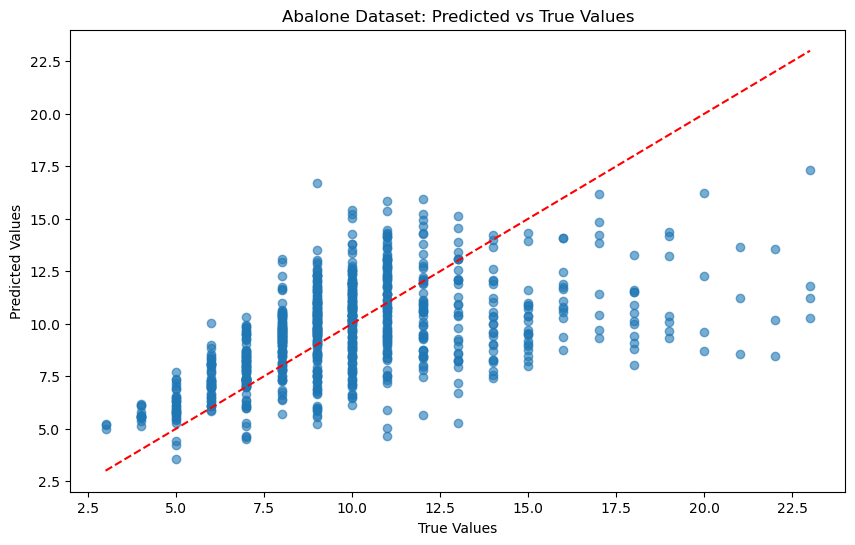

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 857ms/step


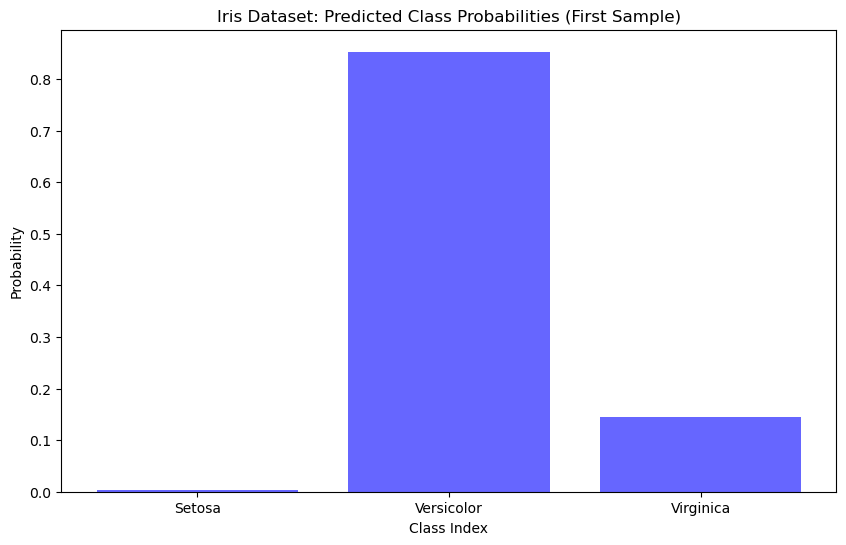

Predicted Classes (Iris): [1 0 2 1 1]


In [34]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# 1. Load the saved model for Abalone (Regression)
best_model_abalone = load_model('best_model_abalone.keras')

# 2. Predict on test data for Abalone
predictions_abalone = best_model_abalone.predict(X_test_abalone)

# 3. Plot Predictions vs True Values for Abalone
plt.figure(figsize=(10, 6))
plt.scatter(y_test_abalone, predictions_abalone, alpha=0.6)
plt.plot([min(y_test_abalone), max(y_test_abalone)], [min(y_test_abalone), max(y_test_abalone)], color='r', linestyle='--')
plt.title('Abalone Dataset: Predicted vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

# 4. Load the saved model for Iris (Classification)
best_model_iris = load_model('best_model_iris.keras')

# 5. Predict on test data for Iris
predictions_iris = best_model_iris.predict(X_test_iris)

# 6. Plot Predicted Probabilities for Iris (3 classes)
plt.figure(figsize=(10, 6))
plt.bar(range(len(predictions_iris[0])), predictions_iris[0], color='b', alpha=0.6, label='Prediction Probabilities')
plt.title('Iris Dataset: Predicted Class Probabilities (First Sample)')
plt.xlabel('Class Index')
plt.ylabel('Probability')
plt.xticks(range(3), ['Setosa', 'Versicolor', 'Virginica'])  # Iris class names
plt.show()

# 7. Optionally: Convert predictions to class labels for Iris
predicted_classes_iris = np.argmax(predictions_iris, axis=1)
print("Predicted Classes (Iris):", predicted_classes_iris[:5])
